<font size="+3" color='#053c96'><h2><center> Financial Statement Fraud Detection Notebook</h2></center></font>
<figure>
<center><img src ="https://www.netsuite.com/portal/assets/img/business-articles/accounting-software/bnr-financial-statement-fraud.jpg" width = "750" height = '600' alt="Financial Fraud Detection"/>

<a id='table-of-contents'></a>
[Table of Contents](#table-of-contents)

- [Introduction](#introduction)
  * [Overview](#overview)
  * [Problem Statement](#problem-statement)
  * [Objectives](#goals)
- [Importing Libraries](#importing-dependencies)
- [Data](#data)
- [Exploratory Data Analysis](#exploratory-data-analysis)
  * [Data Exploration](#data-exploration)
  * [Data Visualization](#data-visualization)
  * [Summary Statistics](#summary-statistics)
  * [Feature Correlation](#feature-correlation)

<a id='introduction'></a>
<font size="+2" color='#053c96'><b> 1. Introduction</b></font>  
[back to top](#table-of-contents)  

This project aims to flag fraudulent financial statements from companies that have been issued a guarantee from an insurance company. The purpose is to ensure the financial information used in the credit risk modelling process is sound. The deliverables include a statistical (or other) model that predicts and flags fraudulent financial statements, an analysis of the predicted fraud across different buckets (e.g. industry, year, financial type), and a fraud indicator (or probability) that will allow the use of an extra variable in the credit risk model and give insight into the appropriateness of the data for modelling purposes. Ultimately, the credit underwriters will be the end-users of the output.  

“Credit risk is the risk that a borrower defaults and does not honor its obligation to service debt.”

Excerpt From: Bart Baesens, Tony van Gestel. “Credit Risk Management: Basic Concepts: financial risk components, rating analysis, models, economic and regulatory capital”. Apple Books. 

<a id='overview'></a>
<font size="+1" color='#780404'><b> 1.1 Overview</b></font>  
[back to top](#table-of-contents)

Financial Statement - a complete report on the health of a business taking in balance sheet, income and cash flow. The Financial Statement determines is a business has cash flowto pay bills or repair loans and purchase stock. It tells where thebusiness generate cashfrom and where the cash goes. It tells business profitability and gives overview of the condition of the business, flaging signs of future problems where there is one. The cost of Financial Statement Fraud is estimated at $572 billion Dollars per year in the US. Apart from the direct cost, this phenomenon has negatively affected the employees and investors, undermining the reliabilityof corporate financial statements resulting in higher transactional cost and less efficient markets.

<a id='problem-statement'></a>
<font size="+1" color='#780404'><b> 1.2 Problem Statement</b></font>  
[back to top](#table-of-contents)  

Financial statement fraud refers to the intentional misrepresentation of financial information in order to deceive stakeholders. South Africa has had a number of high-profile cases of financial statement fraud in recent years. One of the most notable cases involved the retail giant Steinhoff International, which was embroiled in a massive accounting scandal in 2017. The company was accused of inflating its earnings and assets, and its share price plummeted as a result. Steinhoff is still dealing with the aftermath of the scandal, which is considered one of the biggest corporate frauds in South African history.  

Financial statement fraud is not limited to South Africa; it is a global issue that affects companies all over the world, including those in Europe, Africa, Asia and America.  

For this project, the problem is that there is a need to ensure that the information used in the credit risk modelling process is sound by identifying and flagging fraudulent financial statements from companies that have been issued a guarantee from an insurance company. Currently, the methods for identifying these fraudulent financial statements are not reliable, which can lead to negative credit risk modelling and financial losses for the insurance company.

<a id='goals'></a>
<font size="+1" color='#780404'><b> 1.3 Objectives</b></font>  
[back to top](#table-of-contents)  

1. Develop a statistical (or other) model that predicts/flags fraudulent financial statements
2. Have a detailed analysis of predicted fraud across different buckets (e.g. industry, year, financial type) and it’s correlation with default
3. Develop a fraud indicator or probability that can be used as an extra variable in the credit risk model to improve the accuracy of credit risk assessments. Having a fraud indicator (or probability) will allow us to:
 - Use it as an extra variable in our credit risk model
 - Give us insight into the appropriateness of the data to be used for modelling purposes
4. Provide insights into the appropriateness of the financial data for credit risk modeling purposes.
5. Provide credit underwriters with accurate and reliable information to make informed decisions about the creditworthiness of companies
6. Help insurance companies to identify potential fraud and reduce their exposure to financial losses.
7. Increase the efficiency of the credit risk modeling process by improving the accuracy of the financial data used in the process.
8. Provide possible solution and recommendations for improving financial reporting standards and regulations to prevent financial statement fraud.

<a id='importing-dependencies'></a>
<font size="+2" color='#053c96'><b> 2. Importing Libraries</b></font>  
[back to top](#table-of-contents)

In [1]:
import sys
# Insert the parent path relative to this notebook so we can import from the src folder.
sys.path.insert(0, "..")

from src.dependencies import *
from src.functions import *

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


To import the necessary dependencies from the src folder, we have inserted the parent path relative to our notebook using sys.path.insert(0, "..").

<a id='data'></a>
<font size="+2" color='#053c96'><b> 3. Data</b></font>  
[back to top](#table-of-contents)

#### Loading the data

Below is the data that will be used in analysis and possible model development

In [2]:
df = load_dataset()

The load_dataset() function reads a CSV file called financials_data.csv from a folder called data which is located in a directory above the current working directory using the relative path ../src/data/. It loads the data into a pandas DataFrame object named df and returns it.

<a id='exploratory-data-analysis'></a>
<font size="+2" color='#053c96'><b> 4. Exploratory Data Anaysis</b></font>  
[back to top](#table-of-contents)

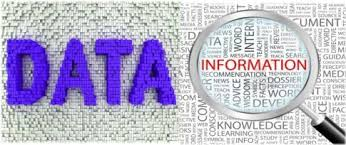

This is a data analytics process to understand the data in depth and learn the different data characteristics, often with visual means. It allows for to get a better feel of the data, finding useful patterns in it.

<a id='data-exploration'></a>
<font size="+1" color='#780404'><b> 4.1 Data Exploration</b></font>  
[back to top](#table-of-contents)

In [3]:
df.shape

(4585, 200)

The output df.shape shows the dimensions of the DataFrame. The first number (4585) represents the number of rows in the DataFrame and the second number (200) represents the number of columns in the DataFrame.

In [4]:
#Checking for duplicates
df.duplicated().any()

False

In [5]:
#Checking for any missing values in the DataFrame
df.isnull().values.any()

False

There are no obvious missing values as shown, we will check for proxies by a numerical value like 0.

In [6]:
#Checking that all columns in the data are of appropriate type for analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4585 entries, 0 to 4584
Columns: 200 entries, DimFacilityKey to Default
dtypes: float64(134), int64(62), object(4)
memory usage: 7.0+ MB


In [7]:
df.head()

,DimFacilityKey,PricingFinancialsID,Financial_Type,Industry,Country,FinancialsDate,PricingFinancialsRevenue,PricingFinancialsCostOfSales,PricingFinancialsGrossProfit,PricingFinancialsOperatingExpensesOverheads,PricingFinancialsOtherGainsOrLosses,PricingFinancialsEBITDA,PricingFinancialsDepreciation,PricingFinancialsTotalFairValueAdjustments,PricingFinancialsEBIT,PricingFinancialsExceptionalItems,PricingFinancialsFinanceIncome,PricingFinancialsOtherBeforeEBIT,PricingFinancialsFinanceCost,PricingFinancialsForeignExchange,PricingFinancialsNetProfitBeforeTax,PricingFinancialsTax,PricingFinancialsNetProfitAfterTax,PricingFinancialsIncomeFromEquityAccountedInvestments,PricingFinancialsDiscontinuedOperations,PricingFinancialsTotalCostBase,PricingFinancialsAmortisation,PricingFinancialsDepreciationAmortisationTotal,PricingFinancialsImpairmentsOfTangibleAssets,PricingFinancialsEBITBeforeFairValueAdjustments,PricingFinancialsImpairmentOfGoodwill,PricingFinancialsShareOfProfitInAssociatesAndJVs,PricingFinancialsOtherAfterEBIT,PricingFinancialsNCA_PropertyPlantEquipment,PricingFinancialsNCA_Goodwill,PricingFinancialsNCA_OtherIntangibles,PricingFinancialsNCA_OtherNonCurrentAssets,PricingFinancialsNCA_TotalNonCurrentAssets,PricingFinancialsNCA_AvailableForSaleInvestments,PricingFinancialsNCA_OtherInterestBearingLoans,PricingFinancialsNCA_OtherNonInterestBearingLoans,PricingFinancialsNCA_CededAssets,PricingFinancialsNCA_UnfavourableAssets,PricingFinancialsNCA_TotalLoansIssued,PricingFinancialsNCA_InvestmentPropertyAndPropertyDevelopments,PricingFinancialsNCA_GoodwillAndOtherIntangibles,PricingFinancialsNCA_InvestmentsInAssociatesAndJVs,PricingFinancialsNCA_LongTermReceivables,PricingFinancialsNCA_InvestmentsInServiceConcessions,PricingFinancialsNCA_FinancialAssetsAtFairValueThroughProfitAndLoss,PricingFinancialsNCA_DeferredTaxAssets,PricingFinancialsNCA_DerivativeFinancialInstruments,PricingFinancialsNCA_AmountsDueFromContractCustomers,PricingFinancialsCA_Inventories,PricingFinancialsCA_CashAndCashEquivalents,PricingFinancialsCA_DerivativeFinancialInstruments,PricingFinancialsCA_TradeAndOtherReceivables,PricingFinancialsCA_InvestmentInJointEntities,PricingFinancialsCA_TotalLoansIssued,PricingFinancialsCA_CurrentTaxationAssets,PricingFinancialsCA_OtherCurrentAssets,PricingFinancialsCA_TotalCurrentAssets,PricingFinancialsTotalAssets,PricingFinancialsCA_OtherInterestBearingLoans,PricingFinancialsCA_OtherNonInterestBearingLoans,PricingFinancialsCA_CededAssets,PricingFinancialsCA_UnfavourableAssets,PricingFinancialsCA_DevelopmentLand,PricingFinancialsCA_ShortTermInvestments,PricingFinancialsCA_ContractsInProgress,PricingFinancialsNCL_DeferredTax,PricingFinancialsNCL_TotalLoansReceived,PricingFinancialsNCL_SubcontractorLiabilities,PricingFinancialsNCL_InstalmentSaleLiabilities,PricingFinancialsNCL_OtherNonCurrentLiabilities,PricingFinancialsNCL_TotalNonCurrentLiabilities,PricingFinancialsNCL_OtherLiabilities,PricingFinancialsTotalLiabilities,PricingFinancialsNCL_TotalEquityAndLiabilities,PricingFinancialsNCL_OtherInterestBearingLoans,PricingFinancialsNCL_OtherNonInterestBearingLoans,PricingFinancialsNCL_PreferenceShares,PricingFinancialsNCL_NonCurrentTradePayables,PricingFinancialsCL_TradeAndOtherPayables,PricingFinancialsCL_TaxationPayable,PricingFinancialsCL_DerivativeFinancialInstruments,PricingFinancialsCL_BankOverdraft,PricingFinancialsCL_TotalLoansReceived,PricingFinancialsCL_ProvisionsForLiabilitiesChargesObligations,PricingFinancialsCL_AmountsReceivedInAdvance,PricingFinancialsCL_AmountsDueToContractCustomers,PricingFinancialsCL_SubcontractorLiabilities,PricingFinancialsCL_InstalmentSaleLiabilities,PricingFinancialsCL_OtherCurrentLiabilities,PricingFinancialsCL_TotalCurrentLiabilities,PricingFinancialsCL_OtherInterestBearingLoans,PricingFinancialsCL_OtherNonInterestBearingLoans,PricingFinancialsCL_CurrentPortionOfInterestBearingBorrowings,PricingFinancialsCL_ContractRelatedProvisions,PricingFinancialsCL_OtherFinancialLiabilities,PricingFin

#### Data Overview

The dataset provided is a collection of related sets of information that is composed of separate elements of financial statements of different companies for different periods from an Insurance firm for evaluation purposes.  The evaluation seeks to detect fraudulent financial statements from the lot.

**The data is grouped into:**
**Numeric data**
* **Financial Statements** - `Income Statement, Balance Sheet, Cashflow Statement`
* **FinancialID** - unique identifier of each financial statement. May appear more than once for different financial period
* **DimFacilityKey** - contains both the facility key and the policy holder key. Facility holder is the company that holds the risk  which is the company under review

**Categorical data**
* **FinancialType** - audited and signed, unaudited financial statement etc
* **Industry** - Company type; Construction, Financial Services etc
* **FinancialDate** - Financial Statement period under review
* **Country** - Industry location
* **Default** - shows whether the company defaulted in the 12 months after the date of the financial statement

The method df.head() displays the first 5 rows of the DataFrame. This can be useful for quickly inspecting the contents of the DataFrame and verifying that it has been loaded correctly.

Attributes names have common characters and are too long.  Renaming them for easy readability

In [8]:
# Removing 'PricingFinancials' from column names
df.columns = df.columns.str.replace('PricingFinancials', '')

In [9]:
df.head()

,DimFacilityKey,ID,Financial_Type,Industry,Country,FinancialsDate,Revenue,CostOfSales,GrossProfit,OperatingExpensesOverheads,OtherGainsOrLosses,EBITDA,Depreciation,TotalFairValueAdjustments,EBIT,ExceptionalItems,FinanceIncome,OtherBeforeEBIT,FinanceCost,ForeignExchange,NetProfitBeforeTax,Tax,NetProfitAfterTax,IncomeFromEquityAccountedInvestments,DiscontinuedOperations,TotalCostBase,Amortisation,DepreciationAmortisationTotal,ImpairmentsOfTangibleAssets,EBITBeforeFairValueAdjustments,ImpairmentOfGoodwill,ShareOfProfitInAssociatesAndJVs,OtherAfterEBIT,NCA_PropertyPlantEquipment,NCA_Goodwill,NCA_OtherIntangibles,NCA_OtherNonCurrentAssets,NCA_TotalNonCurrentAssets,NCA_AvailableForSaleInvestments,NCA_OtherInterestBearingLoans,NCA_OtherNonInterestBearingLoans,NCA_CededAssets,NCA_UnfavourableAssets,NCA_TotalLoansIssued,NCA_InvestmentPropertyAndPropertyDevelopments,NCA_GoodwillAndOtherIntangibles,NCA_InvestmentsInAssociatesAndJVs,NCA_LongTermReceivables,NCA_InvestmentsInServiceConcessions,NCA_FinancialAssetsAtFairValueThroughProfitAndLoss,NCA_DeferredTaxAssets,NCA_DerivativeFinancialInstruments,NCA_AmountsDueFromContractCustomers,CA_Inventories,CA_CashAndCashEquivalents,CA_DerivativeFinancialInstruments,CA_TradeAndOtherReceivables,CA_InvestmentInJointEntities,CA_TotalLoansIssued,CA_CurrentTaxationAssets,CA_OtherCurrentAssets,CA_TotalCurrentAssets,TotalAssets,CA_OtherInterestBearingLoans,CA_OtherNonInterestBearingLoans,CA_CededAssets,CA_UnfavourableAssets,CA_DevelopmentLand,CA_ShortTermInvestments,CA_ContractsInProgress,NCL_DeferredTax,NCL_TotalLoansReceived,NCL_SubcontractorLiabilities,NCL_InstalmentSaleLiabilities,NCL_OtherNonCurrentLiabilities,NCL_TotalNonCurrentLiabilities,NCL_OtherLiabilities,TotalLiabilities,NCL_TotalEquityAndLiabilities,NCL_OtherInterestBearingLoans,NCL_OtherNonInterestBearingLoans,NCL_PreferenceShares,NCL_NonCurrentTradePayables,CL_TradeAndOtherPayables,CL_TaxationPayable,CL_DerivativeFinancialInstruments,CL_BankOverdraft,CL_TotalLoansReceived,CL_ProvisionsForLiabilitiesChargesObligations,CL_AmountsReceivedInAdvance,CL_AmountsDueToContractCustomers,CL_SubcontractorLiabilities,CL_InstalmentSaleLiabilities,CL_OtherCurrentLiabilities,CL_TotalCurrentLiabilities,CL_OtherInterestBearingLoans,CL_OtherNonInterestBearingLoans,CL_CurrentPortionOfInterestBearingBorrowings,CL_ContractRelatedProvisions,CL_OtherFinancialLiabilities,CL_AssetsClassifiedForSale,StatedCapitalShareCapitalAndPremium,RetainedEarnings,OtherComponentsEquity,DistributableReserves,TotalShareholderEquityBeforeMinorities,NonControllingInterests,TotalEquity,NetWorth,EquityPortionOnCompoundInstrument,ConvertibleDebenture,NonDistributableReserves,CFF_InflowIssueShareCapital,CFF_OutflowTreasuryShares,CFF_DividendsPaid,CFF_OtherInflowsFromShares,CFF_OtherOutflowsFromShares,CFF_InterestBorrowingsRaised,CFF_InterestBorrowingsRepaid,CFF_IncDecLongTermLiabilities,CFF_NetIntegroupLoans,CFF_NetServiceConcessions,CFF_InstalmentsCapitalisedLeases,CFF_PostRetirementBenefitsPaid,CFF_OtherInflowsDebt,CFF_OtherOutflowsDebt,CFF_CashEffectsOfFinancingActivitiesDiscontinuedOperations,CFF_NetCFF,CFF_EffectsOfExchangeRates,CFF_CashGeneratedDiscontinuedOps,CFF_NetOverdraftAcquired,CFF_NetOverdraftDisposal,CFF_NetIncCashAndCashEquivalents,CFF_CashAtStartOfYear,CFF_CashAtEndOfYear,CFI_NetPurchasePPE,CFI_Expansion,CFI_Replacement,CFI_ProceedsOnDisposalOfPPE,CFI_GainsLossesDisposalNonCurrentAssets,CFI_IncDecOtherFinAssets,CFI_AcquisitionPPE,CFI_DisposalPPE,CFI_AcquisitionBusinessAndSubsidiaries,CFI_DisposalBusinessAndSubsidiaries,CFI_AcquisitionJVs,CFI_DisposalJVs,CFI_AcquisitionInvestments,CFI_DisposalInvestments,CFI_ProceedsLoanRepayments,CFI_OtherInvestActivitiesInflows,CFI_OtherInvestActivitiesOutflows,CFI_NetCFI,CFO_CashFromOpsBeforeWorkingCapital,CFO_IncDecInventories,CFO_IncDecExcessBillingsWorkDone,CFO_IncDecContractsInProgress,CFO_IncDecTradeAndOtherReceivables,CFO_IncDecShortTermInvestments,CFO_IncDecTradeAndOtherPayables,CFO_SubContractorLiabilities,CFO_DecPayablesOtherT

The code above replaces any occurrence of the string 'PricingFinancials' in the column names of the DataFrame with an empty string, effectively removing it from the column names. This is useful for cleaning up column names to improve readability

In [ ]:
# Standardizing date format
financials_date = pd.to_datetime(df['FinancialsDate'])
df['Date'] = financials_date
df['Year'] = financials_date.dt.year
df['Month'] = financials_date.dt.month
df['Week'] = financials_date.dt.isocalendar().week
df['Day'] = financials_date.dt.day

These lines of code create new columns in a pandas DataFrame object named df based on the 'FinancialsDate' column. Specifically:

- df['Year'] = pd.to_datetime(df['FinancialsDate']).dt.year creates a new column called 'Year' which extracts the year from the 'FinancialsDate' column using the pd.to_datetime() function and the .dt.year attribute of the resulting datetime object.

- df['Month'] = pd.to_datetime(df['FinancialsDate']).dt.month creates a new column called 'Month' which extracts the month from the 'FinancialsDate' column using the .dt.month attribute of the datetime object.

- df['Week'] = pd.to_datetime(df['FinancialsDate']).dt.isocalendar().week creates a new column called 'Week' which extracts the week number from the 'FinancialsDate' column using the .dt.isocalendar().week attribute of the datetime object.

- df['Day'] = pd.to_datetime(df['FinancialsDate']).dt.day creates a new column called 'Day' which extracts the day of the month from the 'FinancialsDate' column using the .dt.day attribute of the datetime object.

These operations can be useful for time-series analysis, as they allow us to easily group data by year, month, week, or day.

## Exploring the Financial Statement

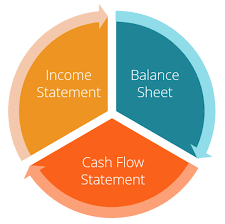


`The income statement, balance sheet, and statement of cash flows` are required financial statements. These three statements are informative tools that are used to analyze a company's financial strength and provide a quick picture of a company's financial health and underlying value.

### Income Statement Analysis

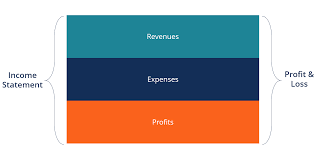

An income statement is a financial statement that shows you the company's income and expenditures. It also shows whether a company is making profit or loss for a given period.

The most noteable income statement items include:

**Sales/Revenue** is the company’s revenue from sales or services. it is the gross of the costs associated with creating the goods sold or in providing services. 

**Gross Profit** calculated by `subtracting Cost of Goods Sold (or Cost of Sales) from Sales Revenue`.

**EBITDA** (Earnings before Interest, Tax, Depreciation, and Amortization) is calculated by subtracting SG&A expenses (excluding amortization and depreciation) from gross profit.

**Depreciation & Amortization Expense** Non-cash expenses that are created by accountants to spread out the cost of capital assets such as Property, Plant, and Equipment (PP&E).

**Operating Income (or EBIT)** represents what’s earned from regular business operations. It is the profit before any non-operating income, non-operating expenses, interest, or taxes are subtracted from revenues.

**Net Income** calculated by deducting income taxes from pre-tax income. This is the amount that flows into retained earnings on the balance sheet, after deductions for any dividends.

In [12]:
# extracting income statement data
income_statement = df[['DimFacilityKey', 'ID', 'Financial_Type', 'Industry', 'Country',
    'FinancialsDate', 'Year', 'Month', 'Week', 'Day', 'Revenue', 'CostOfSales',
    'GrossProfit', 'OperatingExpensesOverheads', 'OtherGainsOrLosses', 'TotalCostBase',
    'EBITDA', 'Depreciation', 'Amortisation', 'DepreciationAmortisationTotal',
    'ImpairmentsOfTangibleAssets', 'EBITBeforeFairValueAdjustments', 'TotalFairValueAdjustments',
    'ExceptionalItems', 'OtherBeforeEBIT', 'EBIT', 'OtherAfterEBIT', 'ShareOfProfitInAssociatesAndJVs',
    'DiscontinuedOperations', 'IncomeFromEquityAccountedInvestments', 'ForeignExchange', 'FinanceCost',
    'FinanceIncome', 'ImpairmentOfGoodwill', 'NetProfitBeforeTax', 'Tax', 'NetProfitAfterTax', 'Default']].copy()


The code above creates a new pandas DataFrame object called income_statement which contains a subset of the columns from the original DataFrame df.  
This subset of columns may be more useful for analyzing the income statement of the companies.

In [38]:
income_statement.shape

(4585, 38)

Exploring some features in the Income Statement to confirm their correctness. Incorrect values captured will indicate anomalies in the financial statements.

In [39]:
# Check if Gross Profit is calculated properly
income_statement.query('GrossProfit != Revenue + CostOfSales').shape[0]

41

This code checks if the Gross Profit has been calculated properly in the income_statement DataFrame.  
There are **41** incorrect calculations of the Gross Profit

In [40]:
# Check if TotalCostBase is calculated properly
income_statement.query('TotalCostBase != CostOfSales + OperatingExpensesOverheads').shape[0]

832

This code checks if the TotalCostBase has been calculated properly in the income_statement DataFrame.  
There are **832** incorrect calculations of the TotalCostBase

In [41]:
# Check if EBITDA is calculated properly
income_statement.query('EBITDA != Revenue + TotalCostBase').shape[0]

697

This code checks if the EBITDA has been calculated properly in the income_statement DataFrame.  
There are **697** incorrect calculations of the EBITDA

In [42]:
income_statement.query('DepreciationAmortisationTotal != Amortisation + Depreciation').shape[0]

304

This code checks if the DepreciationAmortisationTotal has been calculated properly in the income_statement DataFrame.  
There are **304** incorrect calculations of the DepreciationAmortisationTotal

In [43]:
income_statement.query('EBIT != EBITBeforeFairValueAdjustments + TotalFairValueAdjustments + ExceptionalItems + OtherBeforeEBIT + ImpairmentOfGoodwill').shape[0]

670

This code checks if the EBIT has been calculated properly in the income_statement DataFrame.  
There are **670** incorrect calculations of the EBIT

In [44]:
income_statement.query('NetProfitBeforeTax != EBIT + ExceptionalItems + FinanceIncome + OtherBeforeEBIT + FinanceCost + ForeignExchange+ ShareOfProfitInAssociatesAndJVs ').shape[0]

1388

This code checks if the NetProfitBeforeTax has been calculated properly in the income_statement DataFrame.  
There are **1388** incorrect calculations of the NetProfitBeforeTax

In [46]:
income_statement.query('NetProfitAfterTax != NetProfitBeforeTax + Tax').shape[0]

396

This code checks if the NetProfitAfterTax has been calculated properly in the income_statement DataFrame.  
There are **396** incorrect calculations of the NetProfitAfterTax

### Summary of Income Statement Analysis

The analysis reveals significant inconsistencies in the calculations of key financial features. These discrepancies may stem from errors, potential manipulation, or fraudulent activities. Even though such irregularities may not be exclusively associated with the Defaulters.

### Balance Sheet (Equity, Liabilities, Assets)

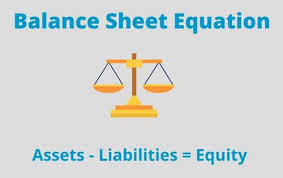

**Balance Sheet Structure**
Balance sheets, like all financial statements, will have minor differences between organizations and industries. However, there are several `buckets` and line items that are almost always included in common balance sheets `Current Assets, Long-Term Assets, Current Liabilities, Long-term Liabilities, and Equity`.

In [13]:
## Extracting Balance Sheet features from financial statement dataframe
bs_df = df[['ID', 'ExceptionalItems', 'ImpairmentsOfTangibleAssets', 'StatedCapitalShareCapitalAndPremium',
            'OtherComponentsEquity', 'TotalShareholderEquityBeforeMinorities', 'NonControllingInterests',
            'TotalEquity', 'NetWorth', 'EquityPortionOnCompoundInstrument', 'ConvertibleDebenture',
            'DistributableReserves', 'NonDistributableReserves', 'RetainedEarnings', 'NCL_DeferredTax',
            'NCL_SubcontractorLiabilities', 'NCL_InstalmentSaleLiabilities', 'NCL_OtherNonCurrentLiabilities',
            'NCL_OtherLiabilities', 'NCL_OtherNonInterestBearingLoans', 'NCL_PreferenceShares', 
            'NCL_NonCurrentTradePayables', 'NCL_ContractRelatedProvisions', 'NCL_TradePayables', 'NCL_OtherPayables', 
            'NCL_LoansFromRelatedParties', 'NCL_OtherProvisions', 'NCL_OtherInterestBearingLoans', 'NCL_TotalLoansReceived',
            'NCL_TotalNonCurrentLiabilities', 'TotalLiabilities', 'NCL_TotalEquityAndLiabilities', 
            'CL_DerivativeFinancialInstruments', 'CL_BankOverdraft', 'CL_AmountsReceivedInAdvance',
            'CL_AmountsDueToContractCustomers', 'CL_SubcontractorLiabilities', 'CL_InstalmentSaleLiabilities',
            'CL_LoansFromRelatedParties', 'CL_OtherNonInterestBearingLoans', 'CL_CurrentPortionOfInterestBearingBorrowings',
            'CL_ContractRelatedProvisions', 'CL_AssetsClassifiedForSale', 'CL_OtherPayables', 
            'CL_ProvisionsForLiabilitiesChargesObligations', 'CL_OtherProvisions', 'CL_OtherInterestBearingLoans', 
            'CL_TradePayables', 'CL_TradeAndOtherPayables', 'CL_TaxationPayable', 'CL_OtherFinancialLiabilities', 
            'CL_OtherCurrentLiabilities', 'CL_TotalLoansReceived', 'CL_TotalCurrentLiabilities', 
            'NCA_PropertyPlantEquipment', 'NCA_Goodwill', 'NCA_OtherIntangibles', 'NCA_GoodwillAndOtherIntangibles',
            'NCA_AvailableForSaleInvestments', 'NCA_CededAssets', 'NCA_UnfavourableAssets', 
            'NCA_InvestmentsInAssociatesAndJVs', 'NCA_InvestmentsInServiceConcessions',
            'NCA_InvestmentPropertyAndPropertyDevelopments', 'NCA_FinancialAssetsAtFairValueThroughProfitAndLoss',             
            'NCA_AmountsDueFromContractCustomers', 'NCA_DerivativeFinancialInstruments', 'NCA_LongTermReceivables',
            'NCA_LongTermReceivablesOther', 'NCA_LongTermReceivablesTrade','NCA_LoansToRelatedParties', 
            'NCA_OtherNonInterestBearingLoans', 'NCA_OtherInterestBearingLoans', 'NCA_TotalLoansIssued',
            'NCA_DeferredTaxAssets', 'NCA_OtherNonCurrentAssets', 'NCA_TotalNonCurrentAssets', 
            'CA_InvestmentInJointEntities', 'CA_CurrentTaxationAssets', 'CA_OtherNonInterestBearingLoans',
            'CA_CededAssets', 'CA_UnfavourableAssets', 'CA_DevelopmentLand', 'CA_ShortTermInvestments',
            'CA_ContractsInProgress', 'CA_OtherReceivables', 'CA_LoansToRelatedParties', 'CA_TradeReceivables',
            'CA_TotalLoansIssued', 'CA_Inventories', 'CA_CashAndCashEquivalents', 'CA_DerivativeFinancialInstruments',
            'CA_TradeAndOtherReceivables', 'CA_OtherInterestBearingLoans', 'CA_OtherCurrentAssets',
            'CA_TotalCurrentAssets', 'TotalAssets']].copy()

print(bs_df.shape)
bs_df.tail(2)

(4585, 97)


,ID,ExceptionalItems,ImpairmentsOfTangibleAssets,StatedCapitalShareCapitalAndPremium,OtherComponentsEquity,TotalShareholderEquityBeforeMinorities,NonControllingInterests,TotalEquity,NetWorth,EquityPortionOnCompoundInstrument,ConvertibleDebenture,DistributableReserves,NonDistributableReserves,RetainedEarnings,NCL_DeferredTax,NCL_SubcontractorLiabilities,NCL_InstalmentSaleLiabilities,NCL_OtherNonCurrentLiabilities,NCL_OtherLiabilities,NCL_OtherNonInterestBearingLoans,NCL_PreferenceShares,NCL_NonCurrentTradePayables,NCL_ContractRelatedProvisions,NCL_TradePayables,NCL_OtherPayables,NCL_LoansFromRelatedParties,NCL_OtherProvisions,NCL_OtherInterestBearingLoans,NCL_TotalLoansReceived,NCL_TotalNonCurrentLiabilities,TotalLiabilities,NCL_TotalEquityAndLiabilities,CL_DerivativeFinancialInstruments,CL_BankOverdraft,CL_AmountsReceivedInAdvance,CL_AmountsDueToContractCustomers,CL_SubcontractorLiabilities,CL_InstalmentSaleLiabilities,CL_LoansFromRelatedParties,CL_OtherNonInterestBearingLoans,CL_CurrentPortionOfInterestBearingBorrowings,CL_ContractRelatedProvisions,CL_AssetsClassifiedForSale,CL_OtherPayables,CL_ProvisionsForLiabilitiesChargesObligations,CL_OtherProvisions,CL_OtherInterestBearingLoans,CL_TradePayables,CL_TradeAndOtherPayables,CL_TaxationPayable,CL_OtherFinancialLiabilities,CL_OtherCurrentLiabilities,CL_TotalLoansReceived,CL_TotalCurrentLiabilities,NCA_PropertyPlantEquipment,NCA_Goodwill,NCA_OtherIntangibles,NCA_GoodwillAndOtherIntangibles,NCA_AvailableForSaleInvestments,NCA_CededAssets,NCA_UnfavourableAssets,NCA_InvestmentsInAssociatesAndJVs,NCA_InvestmentsInServiceConcessions,NCA_InvestmentPropertyAndPropertyDevelopments,NCA_FinancialAssetsAtFairValueThroughProfitAndLoss,NCA_AmountsDueFromContractCustomers,NCA_DerivativeFinancialInstruments,NCA_LongTermReceivables,NCA_LongTermReceivablesOther,NCA_LongTermReceivablesTrade,NCA_LoansToRelatedParties,NCA_OtherNonInterestBearingLoans,NCA_OtherInterestBearingLoans,NCA_TotalLoansIssued,NCA_DeferredTaxAssets,NCA_OtherNonCurrentAssets,NCA_TotalNonCurrentAssets,CA_InvestmentInJointEntities,CA_CurrentTaxationAssets,CA_OtherNonInterestBearingLoans,CA_CededAssets,CA_UnfavourableAssets,CA_DevelopmentLand,CA_ShortTermInvestments,CA_ContractsInProgress,CA_OtherReceivables,CA_LoansToRelatedParties,CA_TradeReceivables,CA_TotalLoansIssued,CA_Inventories,CA_CashAndCashEquivalents,CA_DerivativeFinancialInstruments,CA_TradeAndOtherReceivables,CA_OtherInterestBearingLoans,CA_OtherCurrentAssets,CA_TotalCurrentAssets,TotalAssets
4583,11982,0.00,0,0.00,0.00,-2202662.00,0.00,8093338.00,-2202662.00,0,0,0.00,0.00,-2202662.00,0.00,0,0.00,0.00,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,14214639.00,14892917.00,22986255.00,0,0.00,0.00,0.00,0,0.00,0.00,0,0.00,0,0,0.00,0.00,542000.00,0.00,0.00,136278.00,0.00,0.00,0.00,0.00,678278.00,17396.00,0.00,0.00,0.00,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,82403.00,0.00,16289212.00,0,0.00,0.00,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,175556.00,0.00,188811.00,0.00,0.00,6697043.00,22986255.00
4584,11988,0.00,0,0.00,0.00,41868493.00,0.00,55868493.00,41868493.00,0,0,0.00,0.00,41868493.00,584441.00,0,0.00,0.00,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,177573987.00,885002068.00,1118444548.00,0,0.00,0.00,0.00,0,0.00,0.00,0,0.00,0,0,0.00,0.00,0.00,0.00,0.00,471666.00,0.00,0.00,0.00,0.00,885002068.00,773570.00,0.00,0.00,0.00,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5615378.00,0,0.00,0.00,0,0,0,0.00,0.00,0.00,500000.00,0.00,500000.00,0.00,179197190.00,0.00,6310345.00,0.00,0.00,1112829170.00,1118444548.00


Taking a look at what makes up the balance sheet in the financial statement. There are 97 features that make up the balance sheet which are further divided into `Equity, Asset and Liabilities`.

#### Equity - Definition of some terms

**Shareholder equity** is the money attributable to the owners of a business or its shareholders. It is also known as net assets since it is equivalent to the total assets of a company minus its liabilities or the debt it owes to non-shareholders.

**Retained earnings** are the net earnings a company either reinvests in the business or uses to pay off debt. The remaining amount is distributed to shareholders in the form of dividends.

**Networth** is a generic term that describes what a company/individual can keep after paying off its/his liabilities.  `In business, net worth is also known as book value or shareholders' equity. The balance sheet is also known as a net worth statement. The value of a company's equity equals the difference between the value of total assets and total liabilities`.

**Exceptional item** is a charge incurred by a company that must be noted separately in its financial report. An exceptional item is a large number with a substantial impact on the company's profit or loss, but it is closely related to its day-to-day business. For example, if a company undertakes a major restructuring, cutting staff and merging divisions, the costs of that operation will be recorded as an exceptional item.

**Impaiments of tangible asstes** an asset is said to be impaired when its carrying amount is greater than its recoverable amount or fair value. Impairment losses will be recognized whenever the asset’s carrying amount is not recoverable. Note Impairment losses are shown both on the income statement and the balance sheet. An impairment loss is simultaneously recorded as an expense on the income statement and reduces the value of the impaired asset on the balance sheet.

Ideally, the total equity should be equal to the summation of all the equity transaction amounts.

Check this condition to see whether the Total Equity variable is captured accurately for the financial statement.

In [14]:
cases = len(bs_df)
totalequity = (bs_df['ExceptionalItems'] + bs_df['ImpairmentsOfTangibleAssets'] +
              bs_df['StatedCapitalShareCapitalAndPremium'] + bs_df['NonControllingInterests'] + 
              bs_df['ConvertibleDebenture'] + bs_df['EquityPortionOnCompoundInstrument'] + 
              bs_df['OtherComponentsEquity'] + bs_df['DistributableReserves'] + 
              bs_df['NonDistributableReserves'] + bs_df['RetainedEarnings'])
correct_count = len(bs_df[bs_df.TotalEquity == totalequity])
incorrect_count = len(bs_df[bs_df.TotalEquity != totalequity])
incorrect_percentage = round(incorrect_count/cases*100, 2)

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Correct cases are {}'.format(correct_count), attrs = ['bold']))
print(cl('Number of Incorrect cases are {}'.format(incorrect_count), attrs = ['bold']))
print(cl('Percentage of Incorrect cases is {}'.format(incorrect_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------
Total number of cases are 4585
Number of Correct cases are 4282
Number of Incorrect cases are 303
Percentage of Incorrect cases is 6.61
--------------------------------------------


From the result above, there is clearly some incorrect total equity values in the balance sheet of the financial statement.

6.6% (303) of the total equity in the balance sheet values in the dataset are incorrect while 93% (4282) values are correct indicating errors in the calculations which may influence the training of the model, thus affecting the results.

#### Liabilities - Definition of some terms

**Liabilities** are what the company owes to other parties. This includes debts and other financial obligations that arise as an outcome of business transactions.

Depending on context, liabilities can be classified as current and non-current.

1. `Current liabilities`: These include debts or obligations that have to be fulfilled within a year. Current liabilities are also called short-term assets, and they include accounts payable, interest payable, and short-term loans.

2. `Non-current liabilities`: These are debts or obligations for which the due date is more than a year. Non-current liabilities, also called long-term liabilities, include bonds payable, long-term notes payable, and deferred tax liabilities.

**Noncurrent Liabilities**

Ideally, the total noncurrent liabilities should be equal to the summation of all the noncurrent liability transaction amounts.

Check this condition to see whether the Total Noncurrent variable is captured accurately for the financial statement.

In [15]:
cases = len(bs_df)
total_ncl = (bs_df['NCL_PreferenceShares'] +
                 bs_df['NCL_DeferredTax'] + bs_df['NCL_ContractRelatedProvisions'] + bs_df['NCL_OtherProvisions'] + 
                 bs_df['NCL_NonCurrentTradePayables'] + bs_df['NCL_OtherPayables'] + bs_df['NCL_LoansFromRelatedParties'] + 
                 bs_df['NCL_OtherInterestBearingLoans'] + bs_df['NCL_OtherNonInterestBearingLoans'] + 
                 bs_df['NCL_SubcontractorLiabilities'] + bs_df['NCL_InstalmentSaleLiabilities'] + 
                 bs_df['NCL_OtherNonCurrentLiabilities'] + bs_df['NCL_OtherLiabilities'])
correct_count = len(bs_df[bs_df.NCL_TotalNonCurrentLiabilities == total_ncl])
incorrect_count = len(bs_df[bs_df.NCL_TotalNonCurrentLiabilities != total_ncl])
incorrect_percentage = round(incorrect_count/cases*100, 2)

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Correct cases are {}'.format(correct_count), attrs = ['bold']))
print(cl('Number of Incorrect cases are {}'.format(incorrect_count), attrs = ['bold']))
print(cl('Percentage of Incorrect cases is {}'.format(incorrect_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------
Total number of cases are 4585
Number of Correct cases are 4133
Number of Incorrect cases are 452
Percentage of Incorrect cases is 9.86
--------------------------------------------


From the result above, there is clearly some incorrect total equity values in the balance sheet of the financial statement.

9.9% (452) of the total noncurrent liability in the balance sheet values in the dataset are incorrect while 90% (4133) values are correct indicating errors in the calculations which may influence the training of the model, thus affecting the results.

**Current Libilities**

Ideally, the total current liabilities should be equal to the summation of all the current liability transaction amounts.

Check this condition to see whether the Total current variable is captured accurately for the financial statement.

In [16]:
cases = len(bs_df)
total_cl = (bs_df['CL_DerivativeFinancialInstruments'] +
                 bs_df['CL_BankOverdraft'] + bs_df['CL_AmountsReceivedInAdvance'] + bs_df['CL_AmountsDueToContractCustomers'] + 
                 bs_df['CL_AssetsClassifiedForSale'] + bs_df['CL_ContractRelatedProvisions'] + 
                 bs_df['CL_ProvisionsForLiabilitiesChargesObligations'] + bs_df['CL_OtherProvisions'] + 
                 bs_df['CL_OtherNonInterestBearingLoans'] + bs_df['CL_OtherInterestBearingLoans'] + 
                 bs_df['CL_LoansFromRelatedParties'] + bs_df['CL_CurrentPortionOfInterestBearingBorrowings'] + 
                 bs_df['CL_TradePayables']  + bs_df['CL_OtherPayables']  + bs_df['CL_TaxationPayable'] + 
                 bs_df['CL_SubcontractorLiabilities'] + bs_df['CL_InstalmentSaleLiabilities']  + 
                 bs_df['CL_OtherFinancialLiabilities']  + bs_df['CL_OtherCurrentLiabilities'])

correct_count = len(bs_df[bs_df.CL_TotalCurrentLiabilities == total_cl])
incorrect_count = len(bs_df[bs_df.CL_TotalCurrentLiabilities != total_cl])
incorrect_percentage = round(incorrect_count/cases*100, 2)

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Correct cases are {}'.format(correct_count), attrs = ['bold']))
print(cl('Number of Incorrect cases are {}'.format(incorrect_count), attrs = ['bold']))
print(cl('Percentage of Incorrect cases is {}'.format(incorrect_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------
Total number of cases are 4585
Number of Correct cases are 2681
Number of Incorrect cases are 1904
Percentage of Incorrect cases is 41.53
--------------------------------------------


From the result above, there is clearly some incorrect total equity values in the balance sheet of the financial statement.

41% (1904) of the total current liabilities in the balance sheet values in the dataset are incorrect while 59% (2681) values are correct indicating errors in the calculations which may influence the training of the model, thus affecting the results.

**Equity and Liabilities**

Adding the total equity and total liabilities to compare it with the asset subsequently to get te balance sheet. Confirming the correctness of total equity and liabilities features based on the summation of `totalequity` and `totalliabilities` features.

In [17]:
total_eqlib = (bs_df['TotalEquity'] + bs_df['TotalLiabilities'])
correct_count = len(bs_df[bs_df.NCL_TotalEquityAndLiabilities == total_eqlib])
incorrect_count = len(bs_df[bs_df.NCL_TotalEquityAndLiabilities != total_eqlib])
incorrect_percentage = round(incorrect_count/cases*100, 2)

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Correct cases are {}'.format(correct_count), attrs = ['bold']))
print(cl('Number of Incorrect cases are {}'.format(incorrect_count), attrs = ['bold']))
print(cl('Percentage of Incorrect cases is {}'.format(incorrect_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------
Total number of cases are 4585
Number of Correct cases are 4541
Number of Incorrect cases are 44
Percentage of Incorrect cases is 0.96
--------------------------------------------


From the result above, there is clearly very few incorrect total equity and liabilities values in the balance sheet of the financial statement when adding the total equity and total liabilities features.

0.96% (44) of the total equity and liabilities in the balance sheet values in the dataset are incorrect while 99% (4541) values are correct. While the total equity and liabilities is almost correct, the same cannot be said of the individual total equity and its total liabilities counterpart.  `This needs to be probed further`.

### Assets

`An asset` is something that the company owns and that is beneficial for the growth of the business. Assets can be classified based on convertibility, physical existence, and usage. 

a. **Convertibility** describes whether the asset can be easily converted to cash. Based on convertibility, assets are further classified into current assets and fixed assets.

**Current assets** - assets which can be easily converted into cash or cash equivalents within a duration of one year. Examples include short-term deposits, marketable securities, and stock.

**Fixed assets** - assets which cannot be easily or readily converted to cash. Examples include buildings, machinery, equipment, or trademarks.

b. **Physical existence** can be of two types, `tangible and intangible`.

**Tangible assets** can be seen and felt, like office supplies, machinery, equipment, and buildings.

**Intangible assets** do not have physical existence, like patents, brands, and copyrights.

c. **Usage** can be classified as `operating and non-operating assets`.

**Operating assets** are necessary to conduct business operations, example, buildings, machinery, and equipment.

**Non-operating assets** are Short-term investments or marketable securities that are not necessary for daily operations.

**Current assets** are a company's short-term assets; those that can be liquidated quickly and used for a company's immediate needs.

**Noncurrent assets** are long-term and have a useful life of more than a year. Examples of current assets include cash, marketable securities, inventory, and accounts receivable.

**Noncurrent assets**

Ideally, the total noncurrent assets should be equal to the summation of all the noncurrent assets transaction amounts.

Check this condition to see whether the Total Noncurrent variable is captured accurately for the financial statement.

In [18]:
total_nca = (bs_df['NCA_PropertyPlantEquipment'] +
                 bs_df['NCA_Goodwill'] + bs_df['NCA_OtherIntangibles'] + bs_df['NCA_AvailableForSaleInvestments'] +
                 bs_df['NCA_CededAssets'] + bs_df['NCA_UnfavourableAssets'] + bs_df['NCA_InvestmentsInAssociatesAndJVs'] +
                 bs_df['NCA_InvestmentsInServiceConcessions'] + bs_df['NCA_InvestmentPropertyAndPropertyDevelopments'] +
                 bs_df['NCA_FinancialAssetsAtFairValueThroughProfitAndLoss'] + bs_df['NCA_AmountsDueFromContractCustomers'] +
                 bs_df['NCA_DerivativeFinancialInstruments'] + bs_df['NCA_LongTermReceivables'] +
                 bs_df['NCA_LongTermReceivablesOther'] + bs_df['NCA_LoansToRelatedParties'] + 
                 bs_df['NCA_OtherNonInterestBearingLoans'] + bs_df['NCA_OtherInterestBearingLoans'] +
                 bs_df['NCA_DeferredTaxAssets'] + bs_df['NCA_OtherNonCurrentAssets'])

correct_count = len(bs_df[bs_df.NCA_TotalNonCurrentAssets == total_nca])
incorrect_count = len(bs_df[bs_df.NCA_TotalNonCurrentAssets != total_nca])
incorrect_percentage = round(incorrect_count/cases*100, 2)

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Correct cases are {}'.format(correct_count), attrs = ['bold']))
print(cl('Number of Incorrect cases are {}'.format(incorrect_count), attrs = ['bold']))
print(cl('Percentage of Incorrect cases is {}'.format(incorrect_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------
Total number of cases are 4585
Number of Correct cases are 3940
Number of Incorrect cases are 645
Percentage of Incorrect cases is 14.07
--------------------------------------------


From the result above, there is clearly some incorrect total equity values in the balance sheet of the financial statement.

14% (645) of the total noncurrent assets in the balance sheet values in the dataset are incorrect while 86% (3940) values are correct indicating errors in the calculations which may influence the training of the model, thus affecting the results.

**Current Assets**

Ideally, the total current assets should be equal to the summation of all the current assets transaction amounts.

Check this condition to see whether the Total current assets variable is captured accurately for the financial statement.

In [19]:
total_ca = (bs_df['CA_CashAndCashEquivalents'] +
                 bs_df['CA_DerivativeFinancialInstruments'] + bs_df['CA_ContractsInProgress'] + bs_df['CA_DevelopmentLand'] +
                 bs_df['CA_ShortTermInvestments'] + bs_df['CA_InvestmentInJointEntities'] + bs_df['CA_Inventories'] +
                 bs_df['CA_LoansToRelatedParties'] + bs_df['CA_OtherInterestBearingLoans'] + 
                 bs_df['CA_OtherNonInterestBearingLoans'] + bs_df['CA_TradeReceivables'] + bs_df['CA_OtherReceivables'] + 
                 bs_df['CA_CurrentTaxationAssets'] + bs_df['CA_CededAssets'] + bs_df['CA_UnfavourableAssets'] + 
                 bs_df['CA_OtherCurrentAssets'])

correct_count = len(bs_df[bs_df.CA_TotalCurrentAssets == total_ca])
incorrect_count = len(bs_df[bs_df.CA_TotalCurrentAssets != total_ca])
incorrect_percentage = round(incorrect_count/cases*100, 2)

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Correct cases are {}'.format(correct_count), attrs = ['bold']))
print(cl('Number of Incorrect cases are {}'.format(incorrect_count), attrs = ['bold']))
print(cl('Percentage of Incorrect cases is {}'.format(incorrect_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------
Total number of cases are 4585
Number of Correct cases are 3694
Number of Incorrect cases are 891
Percentage of Incorrect cases is 19.43
--------------------------------------------


From the result above, there is clearly some incorrect total equity values in the balance sheet of the financial statement.

19% (891) of the total noncurrent assets in the balance sheet values in the dataset are incorrect while 81% (3694) values are correct indicating errors in the calculations which may influence the training of the model, thus affecting the results.

Finding the total assets values of our financial statement (balance sheet)

In [20]:
# Sum up and compare the total assets attribute for exceptions
total_assets = (bs_df['NCA_TotalNonCurrentAssets'] + bs_df['CA_TotalCurrentAssets'])

correct_count = len(bs_df[bs_df.TotalAssets == total_assets])
incorrect_count = len(bs_df[bs_df.TotalAssets != total_assets])
incorrect_percentage = round(incorrect_count/cases*100, 2)

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Correct cases are {}'.format(correct_count), attrs = ['bold']))
print(cl('Number of Incorrect cases are {}'.format(incorrect_count), attrs = ['bold']))
print(cl('Percentage of Incorrect cases is {}'.format(incorrect_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------
Total number of cases are 4585
Number of Correct cases are 4384
Number of Incorrect cases are 201
Percentage of Incorrect cases is 4.38
--------------------------------------------


From the result above, there is clearly some incorrect total equity values in the balance sheet of the financial statement.

4% (201) of the total noncurrent assets in the balance sheet values in the dataset are incorrect while 96% (4384) values are correct indicating errors in the calculations which may influence the training of the model, thus affecting the results.

#### Calculating Balance Sheet
The balance sheet is based on the fundamental equation: `Assets = Liabilities + Equity`

In [21]:
#Compare the total assets with total equity and liabilities for exceptions

correct_count = len(bs_df[bs_df.TotalAssets == bs_df.NCL_TotalEquityAndLiabilities])
incorrect_count = len(bs_df[bs_df.TotalAssets != bs_df.NCL_TotalEquityAndLiabilities])
incorrect_percentage = round(incorrect_count/cases*100, 2)

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Correct cases are {}'.format(correct_count), attrs = ['bold']))
print(cl('Number of Incorrect cases are {}'.format(incorrect_count), attrs = ['bold']))
print(cl('Percentage of Incorrect cases is {}'.format(incorrect_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------
Total number of cases are 4585
Number of Correct cases are 4571
Number of Incorrect cases are 14
Percentage of Incorrect cases is 0.31
--------------------------------------------


From the result above, there is clearly very few incorrect total equity and liabilities values in the balance sheet of the financial statement when adding the total equity and total liabilities features.

0.31% (14) of the total equity and liabilities in the balance sheet values in the dataset are incorrect while 99.6% (4571) values are correct. While the total equity and liabilities is almost correct, the same cannot be said of the individual total equity and its total liabilities counterpart. This needs to be probed further.

### Cash Flow Statement

 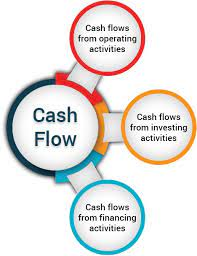

**A cash flow statement** provides information about a company's cash inflows and outflows during a given period of time. It is one of the three key financial statements used by investors, analysts, and other stakeholders to `evaluate a company's financial performance`.

The cash flow statement is divided into three sections: **operating activities, investing activities, and financing activities**. Each section shows the cash flows associated with a particular type of business activity.

- `Cash flows from operating activities`shows the cash inflows and outflows related to a company's core business operations, such as sales and expenses.

- `Cash flows from investing activities` shows the cash inflows and outflows related to a company's investments in long-term assets, such as property, plant, and equipment, and other investments.

- `Cash flows from financing activities`: This section shows the cash inflows and outflows related to a company's financing activities, such as borrowing and issuing stock.

The purpose of the cash flow statement is to provide insight into a company's ability to generate cash, as well as how it uses that cash to fund its operations and investments. By analyzing the cash flow statement, investors and analysts can gain a better understanding of a company's financial health, liquidity, and cash management practices.

#### Cash flow from financing activities (CFF)

Reports the cash inflows and outflows related to a company's financing activities during a specific period. `Financing activities are those activities that involve the borrowing or repaying of funds, or the issuance or repurchase of shares`.

**CFF cash inflows** include proceeds from the issuance of debt or equity, and loans received. 
**CFF cash outflows** include payments of dividends, repayment of debt, and repurchase of shares.

The CFF provides important information about a company's financing decisions and its ability to generate cash from financing activities. `A positive CFF indicates that a company is generating cash from its financing activities, which could be a sign of a healthy business. A negative CFF indicates that a company is spending more cash on its financing activities than it is generating from those activities, which could be a sign of financial distress`.

In [22]:
# Extracting Cash flow financial activities features from financial statement dataframe
cff = df[['ID', 'CFF_CashAtStartOfYear', 'CFF_CashAtEndOfYear', 'CFF_InflowIssueShareCapital', 'CFF_OutflowTreasuryShares',
             'CFF_DividendsPaid', 'CFF_OtherInflowsFromShares', 'CFF_OtherOutflowsFromShares',
             'CFF_InterestBorrowingsRaised', 'CFF_InterestBorrowingsRepaid', 'CFF_IncDecLongTermLiabilities',
             'CFF_NetIntegroupLoans', 'CFF_NetServiceConcessions', 'CFF_InstalmentsCapitalisedLeases',
             'CFF_PostRetirementBenefitsPaid', 'CFF_OtherInflowsDebt', 'CFF_OtherOutflowsDebt',
             'CFF_CashEffectsOfFinancingActivitiesDiscontinuedOperations', 'CFF_EffectsOfExchangeRates',
             'CFF_CashGeneratedDiscontinuedOps', 'CFF_NetOverdraftAcquired', 'CFF_NetOverdraftDisposal',
             'CFF_NetIncCashAndCashEquivalents', 'CFF_NetCFF']].copy()
print(cff.shape)

(4585, 24)


In [23]:
# Check if CFF_NetCFF is calculated properly
cff_netcff = (cff['CFF_InflowIssueShareCapital'] + cff['CFF_OutflowTreasuryShares'] + cff['CFF_DividendsPaid'] + 
            cff['CFF_OtherInflowsFromShares'] + cff['CFF_OtherOutflowsFromShares'] + cff['CFF_InterestBorrowingsRaised'] + 
            cff['CFF_InterestBorrowingsRepaid'] + cff['CFF_IncDecLongTermLiabilities'] + cff['CFF_NetIntegroupLoans'] + 
            cff['CFF_NetServiceConcessions'] + cff['CFF_InstalmentsCapitalisedLeases'] + 
            cff['CFF_PostRetirementBenefitsPaid'] + cff['CFF_OtherInflowsDebt'] + cff['CFF_OtherOutflowsDebt'] + 
            cff['CFF_CashEffectsOfFinancingActivitiesDiscontinuedOperations'] + cff['CFF_EffectsOfExchangeRates'] +
            cff['CFF_CashGeneratedDiscontinuedOps'] + cff['CFF_NetOverdraftAcquired'] + cff['CFF_NetOverdraftDisposal'] + 
            cff['CFF_NetIncCashAndCashEquivalents'] + cff['CFF_CashAtStartOfYear'] + cff['CFF_CashAtEndOfYear'])
            
incorrect_count = len(cff[cff.CFF_NetCFF != cff_netcff])
incorrect_count

4279

It can be deduced from the above code that Net Cash flow financial activities is mostly incorrect which is a huge anomaly.

#### Cash Flow from Investment activities (CFI)

This section reports the cash inflows and outflows related to a company's investing activities during a specific period. These activities include purchases or sales of property, plant, and equipment, investments in securities, and acquisitions or divestitures of businesses.

Positive cash flows from investing activities represent cash inflows, while negative cash flows from investing activities represent cash outflows. A positive cash flow from investing activities could indicate that a company is investing in its business and expanding its operations, while a negative cash flow from investing activities could indicate that a company is selling off assets or reducing its investments.

Overall, CFI activities provides important information about a company's investment decisions and its ability to generate cash from its investments.


In [24]:
# Extracting Cash flow investment activities features from financial statement dataframe
cfi = df[['ID', 'CFI_NetPurchasePPE', 'CFI_Expansion', 'CFI_Replacement', 'CFI_ProceedsOnDisposalOfPPE',
             'CFI_GainsLossesDisposalNonCurrentAssets', 'CFI_IncDecOtherFinAssets', 'CFI_DisposalPPE',
             'CFI_DisposalBusinessAndSubsidiaries', 'CFI_AcquisitionJVs', 'CFI_DisposalJVs', 'CFI_DisposalInvestments',
             'CFI_ProceedsLoanRepayments', 'CFI_OtherInvestActivitiesOutflows', 'CFI_AcquisitionPPE',
             'CFI_AcquisitionBusinessAndSubsidiaries', 'CFI_OtherInvestActivitiesInflows', 'CFI_AcquisitionInvestments',
             'CFI_NetCFI']].copy()

print(cfi.shape)

(4585, 19)


In [25]:
# Checking if the CFI_NetCFI is calculated properly
cfi_netcfi = (cfi['CFI_NetPurchasePPE'] + cfi['CFI_Expansion'] + cfi['CFI_Replacement'] + 
              cfi['CFI_ProceedsOnDisposalOfPPE'] + cfi['CFI_GainsLossesDisposalNonCurrentAssets'] + 
              cfi['CFI_IncDecOtherFinAssets'] + cfi['CFI_AcquisitionPPE'] + cfi['CFI_DisposalPPE'] + 
              cfi['CFI_AcquisitionBusinessAndSubsidiaries'] + cfi['CFI_DisposalBusinessAndSubsidiaries'] + 
              cfi['CFI_AcquisitionJVs'] + cfi['CFI_DisposalJVs'] + cfi['CFI_AcquisitionInvestments'] + 
              cfi['CFI_DisposalInvestments'] + cfi['CFI_ProceedsLoanRepayments'] + cfi['CFI_OtherInvestActivitiesInflows'] + 
              cfi['CFI_OtherInvestActivitiesOutflows'])

incorrect_count = len(cfi[cfi.CFI_NetCFI != cfi_netcfi])
incorrect_count

782

The resulting output reveals that 782 values for the Net Cash Flow from Investment Activities have been calculated incorrectly. This is aan indication of anomaly which will be looked into later

####  Cash Flow Statement from Operating activities (CFO)

This section reports the cash inflows and outflows related to a company's core business operations during a specific period. It provides information about the cash generated or used by a company's day-to-day operations, such as sales and production activities.

Examples of cash inflows from operating activities include revenue from the sale of goods or services, interest received, and dividends received. Examples of cash outflows from operating activities include payments to suppliers, payments to employees, and payments of income taxes.

The CFO activities is a crucial indicator of a company's ability to generate cash from its operations. A positive cash flow from operating activities indicates that a company is generating cash from its core business operations, which could be a sign of a healthy business. A negative cash flow from operating activities indicates that a company is spending more cash on its operations than it is generating from its sales, which could be a sign of financial distress.

In [26]:
cfo = df[['ID', 'CFO_CashFromOpsBeforeWorkingCapital', 'CFO_IncDecInventories', 'CFO_IncDecExcessBillingsWorkDone',
             'CFO_IncDecContractsInProgress', 'CFO_IncDecTradeAndOtherReceivables', 'CFO_IncDecShortTermInvestments',
             'CFO_IncDecTradeAndOtherPayables', 'CFO_SubContractorLiabilities', 'CFO_DecPayablesOtherThanContract',
             'CFO_DecIncEmployeePayables', 'CFO_ExchangeRateOnWorkingCapital', 'CFO_RestatedMovementAndProvisions',
             'CFO_DevelopmentsInProgress', 'CFO_OtherWorkingCapitalMovements', 'CFO_CashOperatingActivities',
             'CFO_InterestPaid', 'CFO_InterestReceived', 'CFO_TaxationPaid', 'CFO_STCAndWithholdingTaxPaid',
             'CFO_DividendsEarnings', 'CFO_DividendsPaid', 'CFO_CashEffectsOfOperatingActivitiesDiscontinuedOperations',
             'CFO_NetCFO', 'CFO_WorkingCapitalChanges', 'CFO_CashReceiptsFromCustomers', 'CFO_CashPaidToSuppliers',
             'CFO_CashPaidToEmployees', 'CFO_IncomeTaxPaidReceived', 'CFO_OtherReceiptsPaymentsOps',
             'CFO_OtherCFO']].copy()

print(cfo.shape)

(4585, 31)


In [27]:
cfo_netcfo = (cfo['CFO_CashFromOpsBeforeWorkingCapital'] + cfo['CFO_IncDecInventories'] + 
            cfo['CFO_IncDecExcessBillingsWorkDone'] + cfo['CFO_IncDecContractsInProgress'] + 
            cfo['CFO_IncDecTradeAndOtherReceivables'] + cfo['CFO_IncDecShortTermInvestments'] + 
            cfo['CFO_IncDecTradeAndOtherPayables'] + cfo['CFO_SubContractorLiabilities'] + 
            cfo['CFO_DecPayablesOtherThanContract'] + cfo['CFO_DecIncEmployeePayables'] + 
            cfo['CFO_ExchangeRateOnWorkingCapital'] + cfo['CFO_RestatedMovementAndProvisions'] + 
            cfo['CFO_DevelopmentsInProgress'] + cfo['CFO_OtherWorkingCapitalMovements'] + 
            cfo['CFO_CashOperatingActivities'] + cfo['CFO_InterestPaid'] + cfo['CFO_InterestReceived'] + 
            cfo['CFO_TaxationPaid'] + cfo['CFO_STCAndWithholdingTaxPaid'] + cfo['CFO_DividendsEarnings'] + 
            cfo['CFO_DividendsPaid'] + cfo['CFO_CashEffectsOfOperatingActivitiesDiscontinuedOperations'] + 
            cfo['CFO_WorkingCapitalChanges'] + cfo['CFO_CashReceiptsFromCustomers'] + cfo['CFO_CashPaidToSuppliers'] + 
            cfo['CFO_CashPaidToEmployees'] + cfo['CFO_IncomeTaxPaidReceived'] + cfo['CFO_OtherReceiptsPaymentsOps'] + 
            cfo['CFO_OtherCFO'])

incorrect_count = len(cfo[cfo.CFO_NetCFO != cfo_netcfo])
incorrect_count

3415

The resulting output reveals that 3415 values for the Net Cash Flow from operating Activities have been calculated incorrectly, suggesting that only about 1170 out of 4585 financial statements had an accurate calculation of the CFO activities which is a huge anomaly.

#### Checking out the values in the Financial Statement features

Seeing as most of the results of the summation features in the Financial Statements return as incorrect, take a look at the values provided for the features to confirm if there are indeed errors (anomaly) in them.

The next code checks out the positive values in the Income Statement features where the correctness of the data will be confirmed.

In [28]:
counts = (income_statement.drop(['DimFacilityKey', 'ID', 'Financial_Type', 'Industry', 'Country',
                                 'FinancialsDate', 'Year', 'Month', 'Week', 'Day'], axis=1) > 0).sum()
percentages = round(counts / income_statement.shape[0] * 100, 2)
positives_df = pd.concat([counts, percentages], axis=1)
positives_df.columns = ['Count', 'Percentage']
positives_df = positives_df.sort_values(by='Percentage', ascending=False)
positives_df = positives_df[positives_df['Count'] > 0]
positives_df

,Count,Percentage
Revenue,4585,100.00
GrossProfit,4518,98.54
NetProfitBeforeTax,3916,85.41
NetProfitAfterTax,3886,84.75
EBIT,3851,83.99
EBITDA,3671,80.07
FinanceIncome,3316,72.32
EBITBeforeFairValueAdjustments,3209,69.99
OtherGainsOrLosses,2405,52.45
OtherBeforeEBIT,845,18.43


The DataFrame (positives_df) shows the number and percentage of positive values in each column of the income_statement DataFrame and the columns below are not supposed to have any positive values:

- Tax
- FinanceCost
- OperatingExpensesOverheads
- DepreciationAmortisationTotal
- TotalCostBase
- Depreciation
- Amortisation
- CostOfSales

This indicates possible errors in the data collection or fraudulent activity.

With this outcome, we can infer that there are indeed errors (anomalies) in the financial statements if the same checks is done on the negative values and other Financial Statements (Balance Sheet and Cash Flow Statement) also.

<a id='Data Visualization'></a>
<font size="+1" color='#780404'><b> 4.2 Data Visualization</b></font>  
[back to top](#table-of-contents)

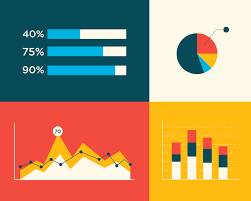

**Checking for Class Imbalance**

In this exploratory analysis, we assess the class imbalance in the dataset. The class imbalance is defined as a percentage of the total number of transactions presented in the `Default` column.

In [29]:
from termcolor import colored as cl # text customization
cases = len(df)
nondefault_count = len(df[df.Default == 0])
default_count = len(df[df.Default == 1])
default_percentage = round(default_count/nondefault_count*100, 2)

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Non-default cases are {}'.format(nondefault_count), attrs = ['bold']))
print(cl('Number of default cases are {}'.format(default_count), attrs = ['bold']))
print(cl('Percentage of default cases is {}'.format(default_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------
Total number of cases are 4585
Number of Non-default cases are 4382
Number of default cases are 203
Percentage of default cases is 4.63
--------------------------------------------


In [30]:
#Getting the ratio of default
default0 = df.loc[df["Default"]==0]
default1 = df.loc[df["Default"]==1]
round(len(default0)/len(default1), 2)

21.59

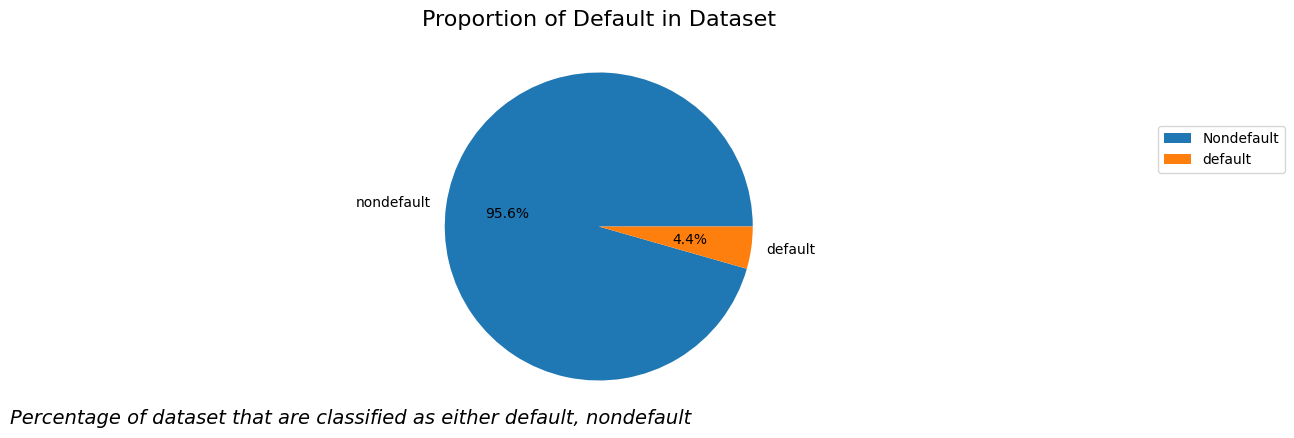

In [31]:
# Plot the proportion of default in dataset
plot1 = plt.figure(figsize=(15,5))
names = ['nondefault','default']
perc = df['Default'].replace({1: 'default', 0:'nondefault'}).value_counts()
perc.name = ''
perc.plot(kind='pie', labels=names, autopct='%1.1f%%')
plt.title('Proportion of Default in Dataset', fontsize = 16)
plt.figtext(0.12, 0.1, 'Percentage of dataset that are classified as either default, nondefault',
            horizontalalignment ='left', fontsize = 14, style='italic')
plt.legend(df['Default'].replace({0:'Nondefault', 1:'default'}).value_counts().index,
           bbox_to_anchor=(2.3,0.7), loc="right")

plt.show()

As shown in the figure above, there is a huge difference between these set of transactions.

Only 4.4% (203) transactions in the dataset are default while 95.6% (4382) transactions are nondefault with ratio of 21.59 indicating hight class imbalance in the dataset. Building a machine learning model on a highly skewed data as shown here, the nondefault transactions will influence the training of the model almost entirely, thus affecting the results.

### Explore Data by Buckets

In this section, let's explore the dataset by examining them by different buckets.

In [32]:
print("Object type values:",np.count_nonzero(df.select_dtypes('object').columns))
print(df.select_dtypes('object').columns)

Object type values: 4
Index(['Financial_Type', 'Industry', 'Country', 'FinancialsDate'], dtype='object')


There are four buckets in the dataset; `Financial Type, Industry, Country, Financial Date` and these will be explored accordingly

In [33]:
#Checking the number of unique values in each bucket
df.describe(include=['O'])

,Financial_Type,Industry,Country,FinancialsDate
count,4585,4585,4585,4585
unique,10,10,15,190
top,Audited - Signed,CONSTRUCTION,South Africa,2017-02-28
freq,3341,2030,2663,503


From the output above, the number of unique values, the most occured and the count of the most occured for each bucket can be seen in summary.

These summary will be shown visually for a better insight.

In [34]:
type_df = count_percentage(df, 'Financial_Type')
country_df = count_percentage(df, 'Country')
industry_df = count_percentage(df, 'Industry')
financialdate_df = count_percentage(df, 'Year')

**Financial Type** `presenting the different financial types`.

The following plot shows the frequencies of the different financial types:

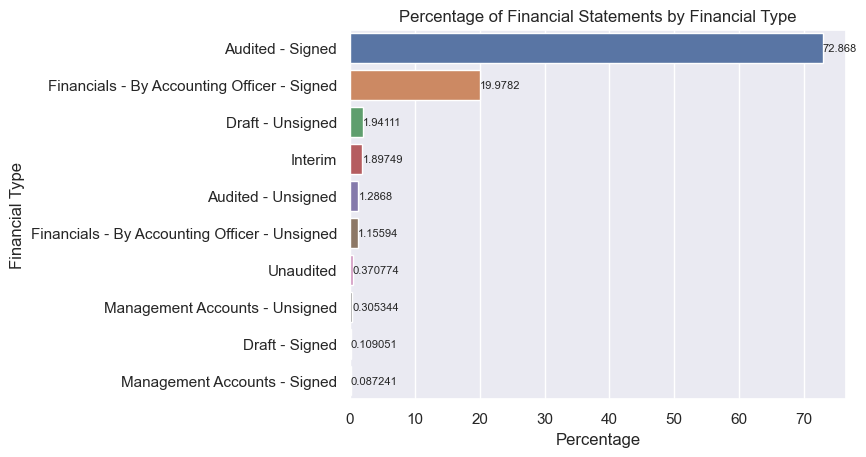

In [35]:
plot_percentage(type_df, 'Financial Type')

The most frequent financial types are Audited - Signed (3341) and Financials - By Accounting Officer - Signed (916).  These two make up more than 90% of dataset

**Industry** `presenting the different industry types`.

The following plot shows the frequencies of the different industry types:

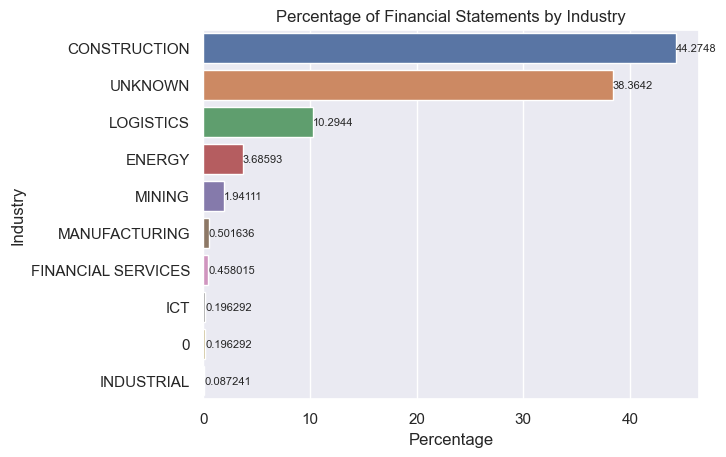

In [36]:
plot_percentage(industry_df, 'Industry')

Checking through the Industry type, the most frequent industry types are Construction (2030) and Unknown (1759). The industry named `0` will be added to the `UNKNOWN` industry as it is also an unknown industry.

**Country** `presenting the different Countries the companies are located`.

The following plot shows the frequencies of the different Country types:

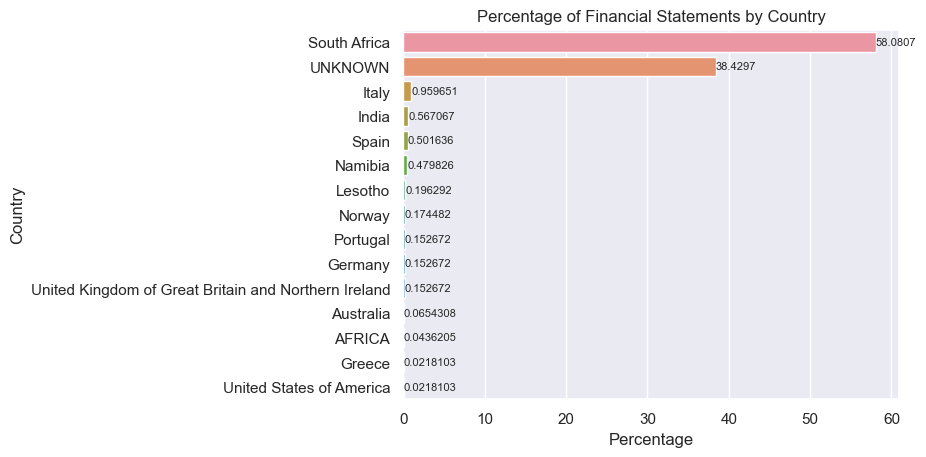

In [37]:
plot_percentage(country_df, 'Country')

The most frequent countries are South Africa (2663) and UNKNOWN (1762) which is more than 90%.  The Country named `AFRICA` will be captured in `UNKNOWN` country as there is no country named `AFRICA`

**Financials Date** `presenting the different financial statements period`.

The following plot shows the frequencies of the different Financial Statement period:

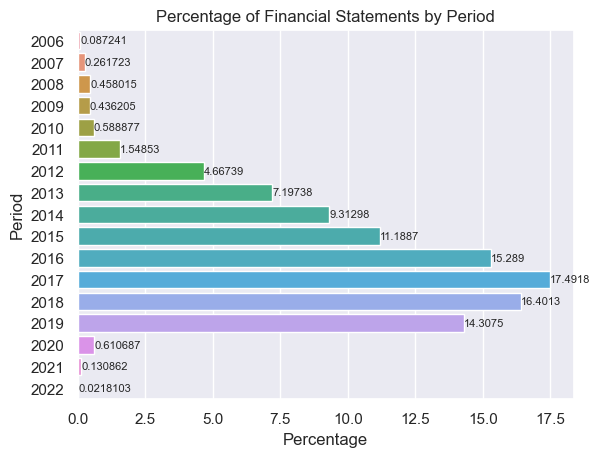

In [38]:
plot_percentage(financialdate_df, 'Period')

The most frequent financials dates are 2017 (802) and 2018 (752).

Digging deeper into the financial dates to see the reporting dates of the statement seeing that various industries and countries have their unique financial year end. Example `financial year end in South Africa is February while it is December for Financial Institutions in Nigeria`.

Next, ploting graphs to show financial year end in as it is in the statements.

The code below creates separate dataframes for each month of the year by filtering the original dataframe df based on the Month column. Each resulting dataframe contains only the rows with the corresponding month value. The resulting dataframes are named after their respective months.

In [39]:
#Assigning months to the statements
january = df[df['Month']==1]
february = df[df['Month']==2]
march = df[df['Month']==3]
april = df[df['Month']==4]
may = df[df['Month']==5]
june = df[df['Month']==6]
july = df[df['Month']==7]
august = df[df['Month']==8]
september = df[df['Month']==9]
october = df[df['Month']==10]
november = df[df['Month']==11]
december = df[df['Month']==12]

In [40]:
year_df = count_percentage(df, 'Year')
month_df = count_percentage(df, 'Month')
week_df = count_percentage(df, 'Week')
day_df = count_percentage(df, 'Day')

This code uses a custom function count_percentage to calculate the percentage of occurrences of unique values in specific columns of the dataframe df. The resulting dataframes are named after their respective time intervals (Year, Month, Week, and Day) and contain two columns: the unique values in the respective column (Year, Month, Week, or Day) and the percentage of their occurrences in the original dataframe.

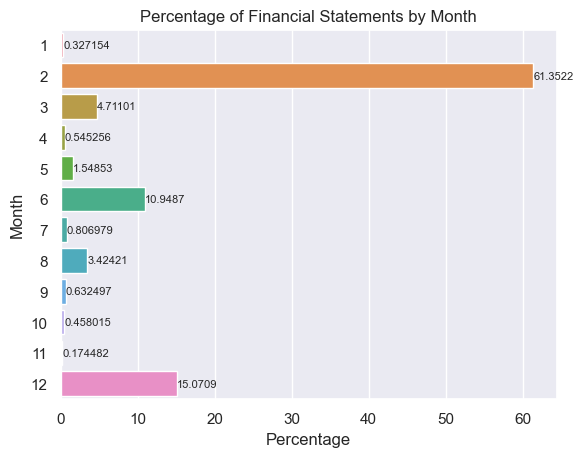

In [41]:
plot_percentage(month_df, 'Month')

The plot above shows most financial year ends in February which is not surprising considering that most of the financial statements came from South Africa. It also shows a chunk of the year end is Decenber followed by June. In all, 87% of te statements shows most industries/Country have their business year end in `February, Decemer and June` respectively. 

#### Using Time SeriesAnalysis

To further show the distribution of Financial Statement reporting

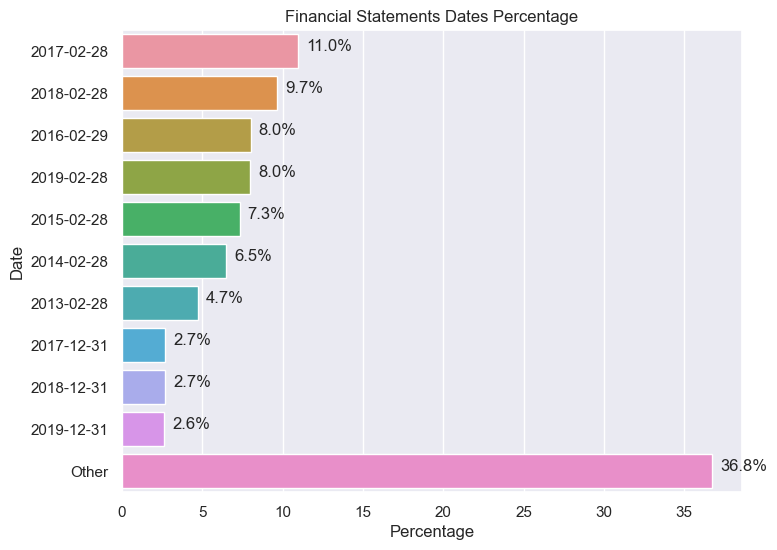

In [42]:
# get value counts of FinancialsDate column
counts = df['FinancialsDate'].value_counts()

# group values less than or equal to 120 together
counts['Other'] = counts[counts <= 120].sum()
counts = counts[counts > 120]

# calculate percentage of each count
percentages = counts / counts.sum() * 100

# create horizontal bar chart
plt.figure(figsize=(8,6))
sns.barplot(x=percentages.values, y=percentages.index)

# set x-axis label
plt.xlabel('Percentage')

# show the percentage of each count on the right side of the chart
for i, v in enumerate(percentages.values):
    plt.text(v + 0.5, i, '{:.1f}%'.format(v))

# set title and y-axis label
plt.title('Financial Statements Dates Percentage')
plt.ylabel('Date')

plt.show()

From the plot, it can be deduced that the financial statements in not evenly distributed across the years,  There are 11% (highest value) financial year end in 2017 February followed by 9% in 2018, February.  Others that presented in January, March - November makes up 38.8% of the distribution.

<a id='summary-statistics'></a>
<font size="+1" color='#780404'><b> 4.3 Summary Statistics</b></font>  
[back to top](#table-of-contents)

In [43]:
#Summary of Statistics of Numeric Variables
df.describe()

,DimFacilityKey,ID,Revenue,CostOfSales,GrossProfit,OperatingExpensesOverheads,OtherGainsOrLosses,EBITDA,Depreciation,TotalFairValueAdjustments,EBIT,ExceptionalItems,FinanceIncome,OtherBeforeEBIT,FinanceCost,ForeignExchange,NetProfitBeforeTax,Tax,NetProfitAfterTax,IncomeFromEquityAccountedInvestments,DiscontinuedOperations,TotalCostBase,Amortisation,DepreciationAmortisationTotal,ImpairmentsOfTangibleAssets,EBITBeforeFairValueAdjustments,ImpairmentOfGoodwill,ShareOfProfitInAssociatesAndJVs,OtherAfterEBIT,NCA_PropertyPlantEquipment,NCA_Goodwill,NCA_OtherIntangibles,NCA_OtherNonCurrentAssets,NCA_TotalNonCurrentAssets,NCA_AvailableForSaleInvestments,NCA_OtherInterestBearingLoans,NCA_OtherNonInterestBearingLoans,NCA_CededAssets,NCA_UnfavourableAssets,NCA_TotalLoansIssued,NCA_InvestmentPropertyAndPropertyDevelopments,NCA_GoodwillAndOtherIntangibles,NCA_InvestmentsInAssociatesAndJVs,NCA_LongTermReceivables,NCA_InvestmentsInServiceConcessions,NCA_FinancialAssetsAtFairValueThroughProfitAndLoss,NCA_DeferredTaxAssets,NCA_DerivativeFinancialInstruments,NCA_AmountsDueFromContractCustomers,CA_Inventories,CA_CashAndCashEquivalents,CA_DerivativeFinancialInstruments,CA_TradeAndOtherReceivables,CA_InvestmentInJointEntities,CA_TotalLoansIssued,CA_CurrentTaxationAssets,CA_OtherCurrentAssets,CA_TotalCurrentAssets,TotalAssets,CA_OtherInterestBearingLoans,CA_OtherNonInterestBearingLoans,CA_CededAssets,CA_UnfavourableAssets,CA_DevelopmentLand,CA_ShortTermInvestments,CA_ContractsInProgress,NCL_DeferredTax,NCL_TotalLoansReceived,NCL_SubcontractorLiabilities,NCL_InstalmentSaleLiabilities,NCL_OtherNonCurrentLiabilities,NCL_TotalNonCurrentLiabilities,NCL_OtherLiabilities,TotalLiabilities,NCL_TotalEquityAndLiabilities,NCL_OtherInterestBearingLoans,NCL_OtherNonInterestBearingLoans,NCL_PreferenceShares,NCL_NonCurrentTradePayables,CL_TradeAndOtherPayables,CL_TaxationPayable,CL_DerivativeFinancialInstruments,CL_BankOverdraft,CL_TotalLoansReceived,CL_ProvisionsForLiabilitiesChargesObligations,CL_AmountsReceivedInAdvance,CL_AmountsDueToContractCustomers,CL_SubcontractorLiabilities,CL_InstalmentSaleLiabilities,CL_OtherCurrentLiabilities,CL_TotalCurrentLiabilities,CL_OtherInterestBearingLoans,CL_OtherNonInterestBearingLoans,CL_CurrentPortionOfInterestBearingBorrowings,CL_ContractRelatedProvisions,CL_OtherFinancialLiabilities,CL_AssetsClassifiedForSale,StatedCapitalShareCapitalAndPremium,RetainedEarnings,OtherComponentsEquity,...,TotalShareholderEquityBeforeMinorities,NonControllingInterests,TotalEquity,NetWorth,EquityPortionOnCompoundInstrument,ConvertibleDebenture,NonDistributableReserves,CFF_InflowIssueShareCapital,CFF_OutflowTreasuryShares,CFF_DividendsPaid,CFF_OtherInflowsFromShares,CFF_OtherOutflowsFromShares,CFF_InterestBorrowingsRaised,CFF_InterestBorrowingsRepaid,CFF_IncDecLongTermLiabilities,CFF_NetIntegroupLoans,CFF_NetServiceConcessions,CFF_InstalmentsCapitalisedLeases,CFF_PostRetirementBenefitsPaid,CFF_OtherInflowsDebt,CFF_OtherOutflowsDebt,CFF_CashEffectsOfFinancingActivitiesDiscontinuedOperations,CFF_NetCFF,CFF_EffectsOfExchangeRates,CFF_CashGeneratedDiscontinuedOps,CFF_NetOverdraftAcquired,CFF_NetOverdraftDisposal,CFF_NetIncCashAndCashEquivalents,CFF_CashAtStartOfYear,CFF_CashAtEndOfYear,CFI_NetPurchasePPE,CFI_Expansion,CFI_Replacement,CFI_ProceedsOnDisposalOfPPE,CFI_GainsLossesDisposalNonCurrentAssets,CFI_IncDecOtherFinAssets,CFI_AcquisitionPPE,CFI_DisposalPPE,CFI_AcquisitionBusinessAndSubsidiaries,CFI_DisposalBusinessAndSubsidiaries,CFI_AcquisitionJVs,CFI_DisposalJVs,CFI_AcquisitionInvestments,CFI_DisposalInvestments,CFI_ProceedsLoanRepayments,CFI_OtherInvestActivitiesInflows,CFI_OtherInvestActivitiesOutflows,CFI_NetCFI,CFO_CashFromOpsBeforeWorkingCapital,CFO_IncDecInventories,CFO_IncDecExcessBillingsWorkDone,CFO_IncDecContractsInProgress,CFO_IncDecTradeAndOtherReceivables,CFO_IncDecShortTermInvestments,CFO_IncDecTradeAndOtherPayables,CFO_SubContractorLiabilities,CFO_DecPayablesOtherThanContract,CFO_DecIncEmployeePayables,CFO_ExchangeRateOnWorkingC

Analyzing the dataset with the statistical method above reveals that some financial features show a large discrepancy between max value and 75% quantile. Furthermore, some standard deviation values quite large which could be a sign of the presence of outliers. This will be handled in feature engineering

<a id='data-preparation'></a>
<font size="+2" color='#053c96'><b> 5. Data Preparation</b></font>  
[back to top](#table-of-contents)

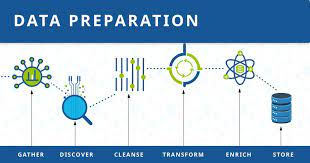

#### Zero- Values in dataset
It is useful to check the quantity of zero valued entries in the dataset. A simple plot of a bar chart of the count of zero valued entries is plotted to look at the situation.

The categorical columns if first dropped from the dataframe as it is not needed now.

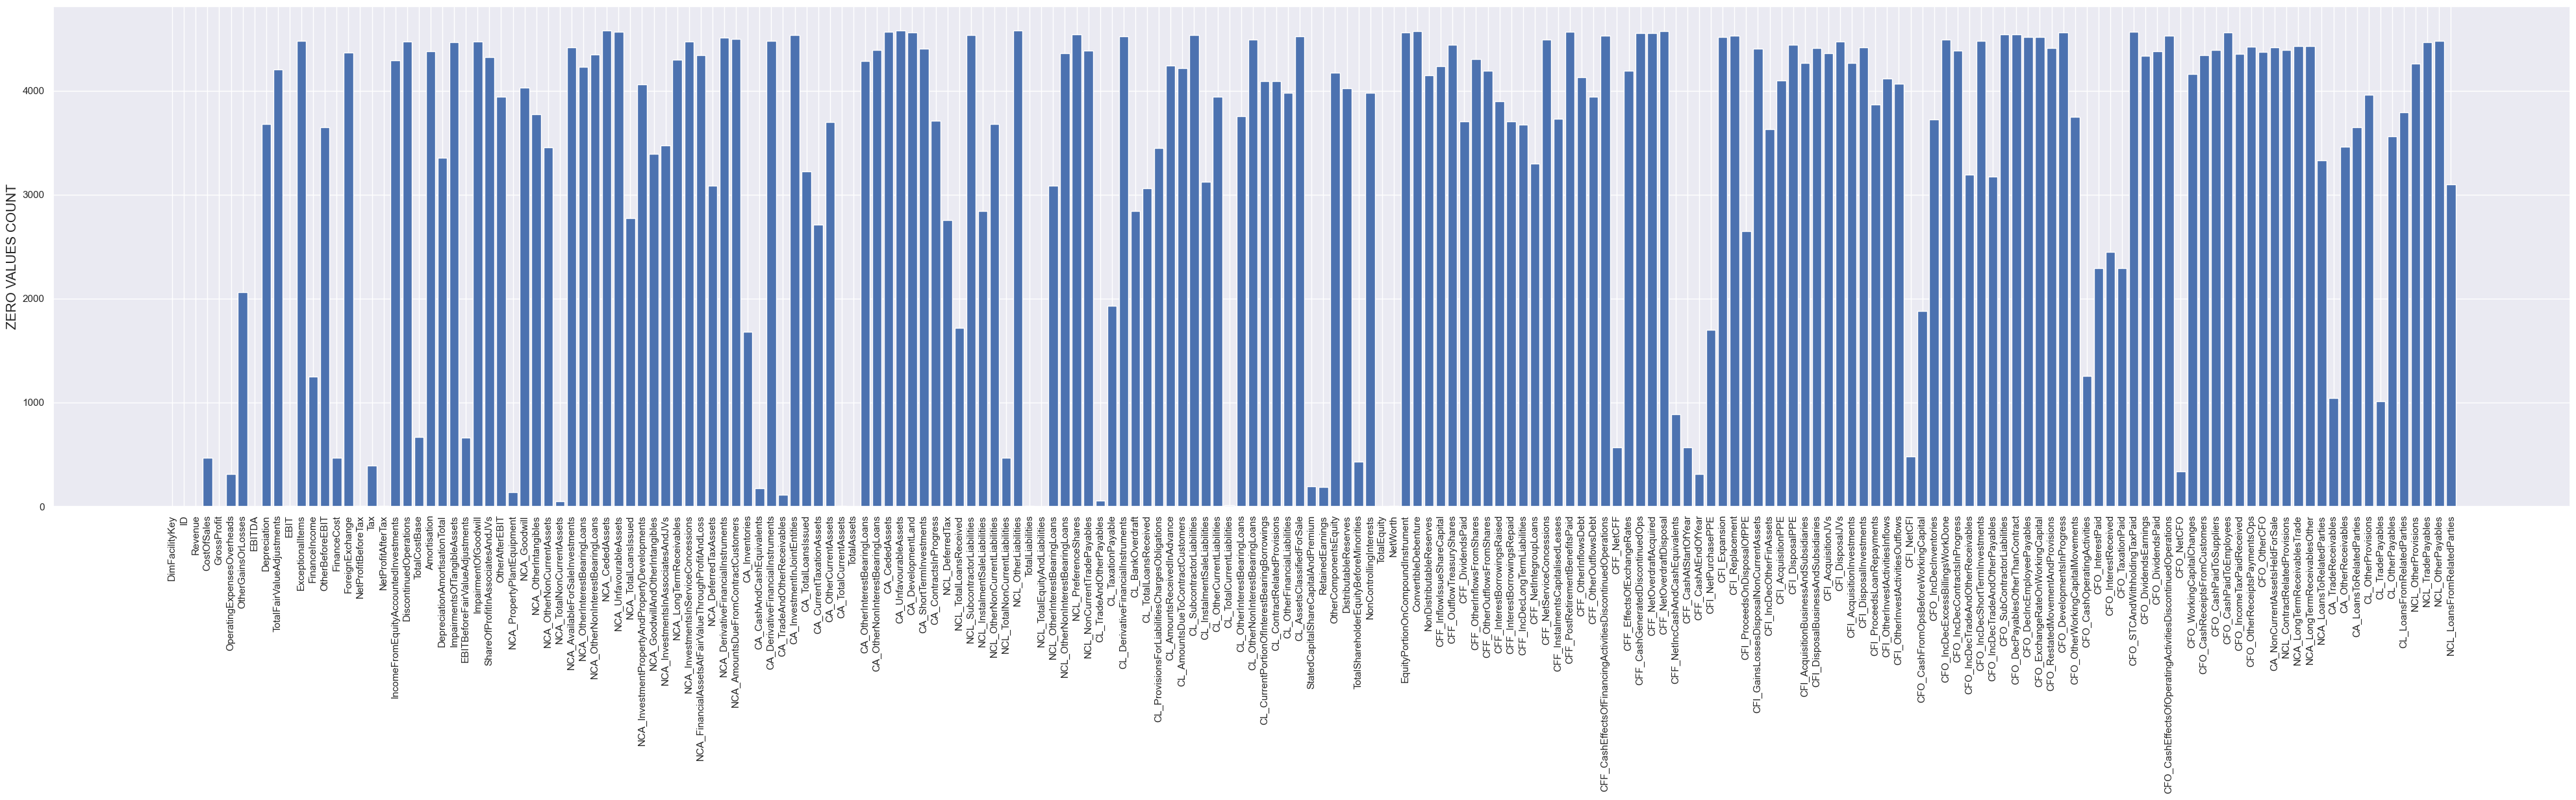

In [44]:
# Drop categorical columns
cat_data = df.loc[:, ['Financial_Type', 'Industry', 'Country', 'FinancialsDate', 'Default', 'Date', 
                      'Year', 'Month', 'Week', 'Day']]
df.drop(['Financial_Type', 'Industry', 'Country', 'FinancialsDate', 'Default', 'Date', 'Year', 'Month', 'Week', 'Day'],
        inplace=True, axis=1)

# Plot initial status of data quality in terms of zero-values
zero_vals = df.isin([0]).sum()
ind = np.arange(df.shape[1])

plt.figure(figsize=(50,10))
plt.bar(ind, zero_vals.values.tolist())
plt.ylabel('ZERO VALUES COUNT', fontsize = 15)
plt.xticks(ind, zero_vals.index.values, rotation='vertical')

plt.show()

Above bar plot shows a lot of zero-valued entries. For some financial statement features, almost all the entries are set at zero. To get more indepth about the situation from a more quantitative point of view, it is useful to count the occurrences of zero valued entries, and sort them in descending order. With this, the dominance level for zero-valued entries will be established.

To get a clearly visual, the graph below shows the top 30 zero-valued dominance features in the dataset.

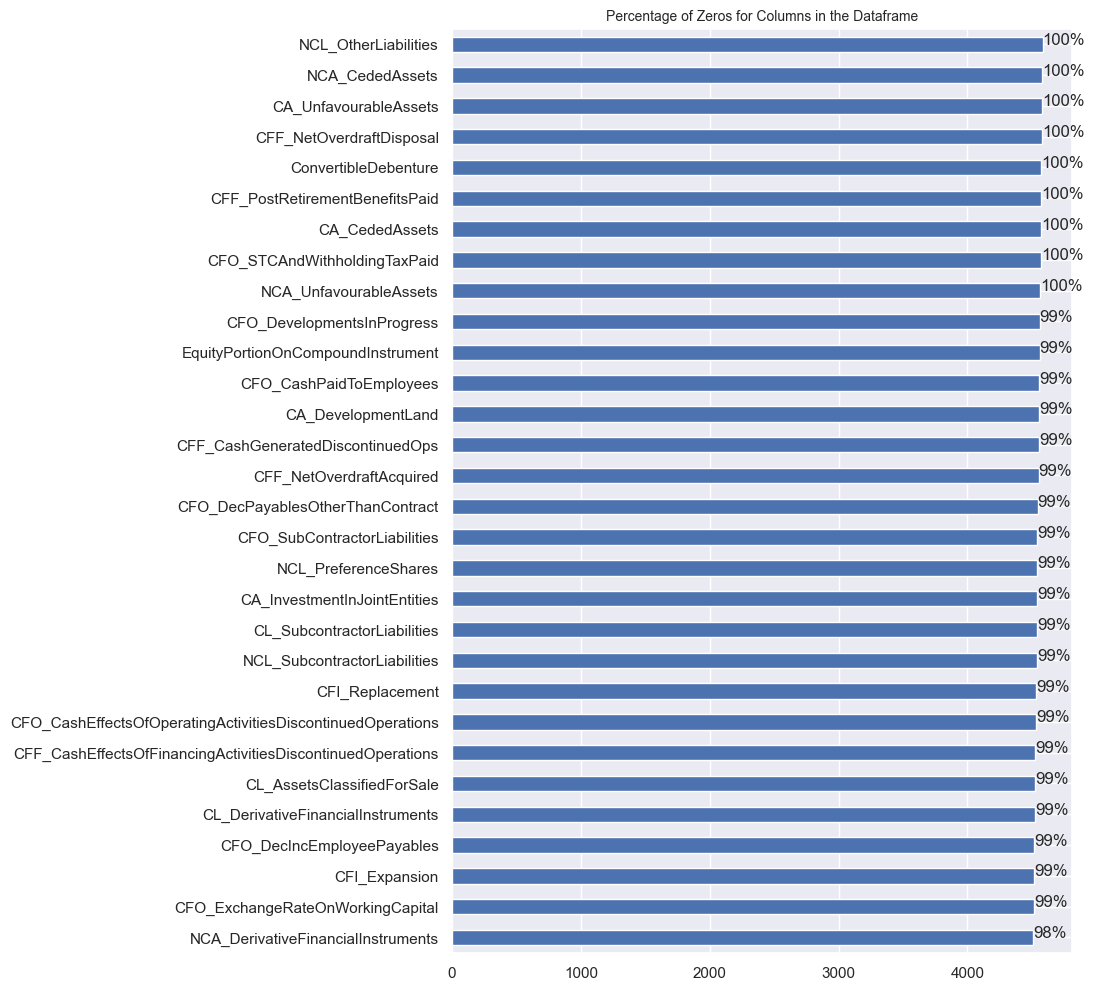

In [45]:
ax = (df == 0).sum().sort_values(ascending=False)[:30][::-1].plot(kind='barh', figsize=(8, 12))
plt.title('Percentage of Zeros for Columns in the Dataframe', fontdict={'size': 10})
for p in ax.patches:
    percentage = '{:,.0f}%'.format((p.get_width() / df.shape[0]) * 100)
    width, height = p.get_width(), p.get_height()
    x = p.get_x() + width + 0.02
    y = p.get_y() + height / 2
    ax.annotate(percentage, (x, y))

### Visualizing Percentage of Zero-Values in Columns

The following code creates a horizontal bar chart to visualize the percentage of zero-values in the top 30 columns of the dataset with the most zero-values. The chart includes annotations showing the exact percentage of zero-values for each column.
